In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
model = tf.keras.Sequential(name="Sequential_API")
model.add(tf.keras.layers.Input(shape = (32,), name="input"))
model.add(tf.keras.layers.Dense(units=32, activation="relu",name="dense1"))
model.add(tf.keras.layers.Dense(units=32, activation="relu", name="dense2"))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid",name="out"))

model.summary()

Model: "Sequential_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 32)                1056      
                                                                 
 dense2 (Dense)              (None, 32)                1056      
                                                                 
 out (Dense)                 (None, 1)                 33        
                                                                 
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________


In [6]:
inputs = tf.keras.layers.Input(shape=(32,),name="input")
hidden1 = tf.keras.layers.Dense(units=32,activation="relu",name="Dense1")(inputs)
hidden2 = tf.keras.layers.Dense(units=16,activation="relu",name="Dense2")(hidden1)
outputs = tf.keras.layers.Dense(units=1,activation="sigmoid",name="outp")(hidden2)

model2 = tf.keras.Model(inputs=inputs,outputs=outputs,name="model2")
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32)]              0         
                                                                 
 Dense1 (Dense)              (None, 32)                1056      
                                                                 
 Dense2 (Dense)              (None, 16)                528       
                                                                 
 outp (Dense)                (None, 1)                 17        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [7]:
class Mymodel(tf.keras.Model):
  def __init__(self,hidden1,hidden2,outputs):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(units=hidden1,activation="relu",name="dense1")
    self.dense2 = tf.keras.layers.Dense(units=hidden2,activation="relu",name="dense2")
    self.outputs = tf.keras.layers.Dense(units=outputs,activation="relu",name="outputs")

  def call(self,inputs):
    result = self.dense1(inputs)
    result = self.dense2(result)

    return self.outputs(result)  


model3 = Mymodel(32,16,1)

In [9]:
model3.build((100,32,))
model3.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  1056      
                                                                 
 dense2 (Dense)              multiple                  528       
                                                                 
 outputs (Dense)             multiple                  17        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [12]:
indian = np.loadtxt("/content/pima-indians-diabetes.csv",delimiter=",")

In [13]:
x = indian[:,:8]
y = indian[:,-1]

In [ ]:
model4 = Mymodel(12,8,1)
checkpoint = tf.keras.callback.ModelCheckpoint(filepath='./model_save/best_model.hdf5', monitor="val_loss",verbose=1,save_best_only=True, save_weights_only=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
model4.compile(optimizer="Adam",loss="binary_crossentropy")

In [14]:
sample = ['너 오늘 이뻐 보인다','나는 오늘 기분이 더러워','끝내주는데,좋은 일이 있나봐','나 좋은 일이 생겼어','아 오늘 진짜 짜증나',"환상적인데, 정말 좋은거 같아"]
targets = [[1],[0],[1],[1],[0],[1]]

In [15]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sample)
print(tokenizer.word_index)

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [18]:
sequences = tokenizer.texts_to_sequences(sample)
input_sequence = np.array(sequences)
input_sequence

array([[ 4,  1,  5,  6],
       [ 7,  1,  8,  9],
       [10,  2,  3, 11],
       [12,  2,  3, 13],
       [14,  1, 15, 16],
       [17, 18, 19, 20]])

In [20]:
batch_size = 2
num_epochs = 100
vocab_size = len(tokenizer.word_index)+1
emb_size = 128
hidden_dimension = 256
output_dimension = 1
model = tf.keras.Sequential(name="Seqential")
model.add(tf.keras.layers.Embedding(vocab_size,emb_size, input_length = 4))
model.add(tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x,axis = 1)))
model.add(tf.keras.layers.Dense(units=hidden_dimension))
model.add(tf.keras.layers.Dense(units=output_dimension))


In [21]:
model.summary()

Model: "Seqential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 128)            2688      
                                                                 
 lambda_1 (Lambda)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [23]:
inputs = tf.keras.Input(shape=(4,))
embedding = tf.keras.layers.Embedding(vocab_size, emb_size, name = "embedding")(inputs)
lamda = tf.reduce_mean(embedding,axis=1)
hidden = tf.keras.layers.Dense(units = hidden_dimension, activation="relu", name = 'dense')(lamda)
outputs  = tf.keras.layers.Dense(units = 1, activation="sigmoid", name = 'outputs')(hidden)
model_nlp = tf.keras.Model(inputs = inputs, outputs = outputs, name="nlp")

model_nlp.summary()

Model: "nlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 embedding (Embedding)       (None, 4, 128)            2688      
                                                                 
 tf.math.reduce_mean_1 (TFOp  (None, 128)              0         
 Lambda)                                                         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 outputs (Dense)             (None, 1)                 257       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
___________________________________________________________

In [30]:
class CustomModel(tf.keras.Model):
  def __init__(self,voca,embeding,length,hidden,output):
    super().__init__()
    self.embedding = tf.keras.layers.Embedding(voca,embeding,input_length = length)
    self.dense = tf.keras.layers.Dense(units = hidden_dimension,activation='relu',name='dense')
    self.outputs = tf.keras.layers.Dense(units = output_dimension, activation = 'sigmoid',name='outputs')

  def call(self,inputs):
    result = self.embedding(inputs)
    result = tf.reduce_mean(result,axis=1)
    result = self.dense(x)

    return self.outputs(x) 


In [36]:
print(input_sequence)
myNLP =  CustomModel(21,128,4,256,1)
model.compile(loss = 'binary_crossentropy',optimizer = "Adam", metrics=['acc'])
model.fit(input_sequence,np.array(targets),batch_size=4,epochs=100)

[[ 4  1  5  6]
 [ 7  1  8  9]
 [10  2  3 11]
 [12  2  3 13]
 [14  1 15 16]
 [17 18 19 20]]
Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 10.2833 - acc: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2833 - acc: 0.3333
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2833 - acc: 0.3333
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2833 - acc: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2833 - acc: 0.3333
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2833 - acc: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2833 - acc: 0.3333
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2833 - acc: 0.3333
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2833 - acc: 0.3333
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 

In [37]:
import sklearn

In [38]:
from sklearn.datasets import load_iris

In [58]:
iris_dataset = load_iris()
iris_data = pd.DataFrame(iris_dataset['data'],columns=iris_dataset['feature_names'])
iris_data['target'] = pd.DataFrame(iris_dataset['target'])
print(iris_data.shape)
iris_data

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [59]:
iris_data_0 = iris_data[iris_data['target'] == 0]
iris_data_1 = iris_data[iris_data['target'] == 1]
iris_data_2 = iris_data[iris_data['target'] == 2]

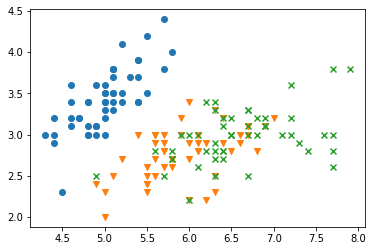

In [60]:
plt.scatter(iris_data_0['sepal length (cm)'],iris_data_0['sepal width (cm)'],marker="o")
plt.scatter(iris_data_1['sepal length (cm)'],iris_data_1['sepal width (cm)'],marker="v")
plt.scatter(iris_data_2['sepal length (cm)'],iris_data_2['sepal width (cm)'],marker="x")
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [62]:
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'],iris_dataset['target'],test_size=0.25,random_state=44)

In [66]:
ss = StandardScaler()
ss.fit(train_input)
ss.transform(train_input)
test_scaled = ss.transform(test_input)
train_scaled = ss.transform(train_input)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_scaled, train_label)

KNeighborsClassifier(n_neighbors=10)

In [69]:
new_input = np.array([[6.1,2.8,4.7,2.2]])
new_scaled = ss.transform(new_input)
new_scaled

array([[ 0.31052382, -0.59224129,  0.53850609,  1.2926475 ]])

In [71]:
predict_label = knn.predict(new_scaled)
predict_label
knn.predict_proba(new_scaled)
knn.predict_proba(test_scaled[:5])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [72]:
predict_test = knn.predict(test_scaled)
print(predict_test)
print(predict_test == test_label)

[2 0 1 1 2 0 2 2 2 1 0 1 0 2 0 0 2 1 0 2 1 1 1 1 2 1 0 1 0 1 0 1 1 2 0 1 0
 0]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True]


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
text_data = ['나는 배가 고프다','내일 점실 뭐 먹지','내일 공부 해야겠다','점심 먹고 공부 해야지']

In [3]:
count_vectorizer = CountVectorizer()

In [4]:
count_vectorizer.fit(text_data)

CountVectorizer()

In [5]:
count_vectorizer.vocabulary_

{'나는': 2,
 '배가': 6,
 '고프다': 0,
 '내일': 3,
 '점실': 7,
 '먹지': 5,
 '공부': 1,
 '해야겠다': 9,
 '점심': 8,
 '먹고': 4,
 '해야지': 10}

In [9]:
count_vectorizer.transform([text_data[0]]).toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]])

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf_vectorizer = TfidfVectorizer()

In [12]:
tfidf_vectorizer.fit(text_data)

TfidfVectorizer()

In [13]:
tfidf_vectorizer.transform([text_data[0]]).toarray()

array([[0.57735027, 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.        ]])

In [14]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import nltk

In [16]:
nltk.download('all-corpora')

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    | 

True

In [17]:
from nltk.tokenize import sent_tokenize

In [20]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
paragraph = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation."
sent_tokenize(paragraph)

['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.',
 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.']

In [23]:
from nltk.corpus.reader.tagged import word_tokenize
word_tokenize(paragraph)

['Natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'subfield',
 'of',
 'computer',
 'science',
 ',',
 'information',
 'engineering',
 ',',
 'and',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'interactions',
 'between',
 'computers',
 'and',
 'human',
 '(',
 'natural',
 ')',
 'languages',
 ',',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'computers',
 'to',
 'process',
 'and',
 'analyze',
 'large',
 'amounts',
 'of',
 'natural',
 'language',
 'data',
 '.',
 'Challenges',
 'in',
 'natural',
 'language',
 'processing',
 'frequently',
 'involve',
 'speech',
 'recognition',
 ',',
 'natural',
 'language',
 'understanding',
 ',',
 'and',
 'natural',
 'language',
 'generation',
 '.']

In [24]:
!java -version

openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


In [25]:
import sys
sys.version

'3.7.15 (default, Oct 12 2022, 19:14:55) \n[GCC 7.5.0]'

In [28]:
!pip install /content/JPype1-1.4.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./JPype1-1.4.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl


In [29]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 6.5 MB/s 


In [30]:
import konlpy
from konlpy.tag import Okt

In [31]:
okt = Okt()
text = "한글 자연어 처리는 재밌다"
print(okt.morphs(text))
print(okt.nouns(text))
print(okt.phrases(text))
print(okt.pos(text))

['한글', '자연어', '처리', '는', '재밌다']
['한글', '자연어', '처리']
['한글', '한글 자연어', '한글 자연어 처리', '자연어', '처리']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective')]


In [34]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [35]:
# 1809890.txt - 1809899.txt
kobill.open('1809890.txt').read()

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------